In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('C:/Users/galaxy/Desktop/2023/JB_Data/loan_customer.csv')


# 데이터 기본 정보 확인
print(data.head())       # 데이터 상위 몇 개 행 출력
print(data.info())       # 데이터 정보 출력 (데이터 타입, 누락값 확인)
print(data.describe())   # 기술 통계량 요약

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
0  Secondary / secondary special  Single / not married  ...   
1  Secondary / secondary special  Single / not married  ...   
2  Secondary / secondary spec

In [36]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(data),"중",len(data[data.isnull().any(axis=1)]))
missing_values = data.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


CODE_GENDER                   7094
FLAG_OWN_REALTY               9571
AMT_CREDIT                    7300
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
CB_SCORE_1                    6146
CB_SCORE_2                    8274
CB_SCORE_3                    7108
dtype: int64

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,NaN,NaN,0,135000.0,NaN,Pensioner,Higher education,Married,...,0,0,XNA,0,1,0,55.568876,64.318198,56.609319,0
23996,456117,Cash loans,NaN,N,1,67500.0,490536.0,Working,Secondary / secondary special,Married,...,0,0,Business Entity Type 3,0,1,0,79.804871,NaN,51.115667,0
23997,456118,Cash loans,M,Y,0,135000.0,995643.0,Working,Higher education,Married,...,0,0,Business Entity Type 3,0,1,0,40.231662,NaN,51.533905,0
23998,456142,Cash loans,NaN,NaN,1,360000.0,1417185.0,Working,Higher education,Single / not married,...,1,1,School,0,1,0,50.734878,NaN,59.707773,0


## 단변랑 분석 시각화

In [11]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns


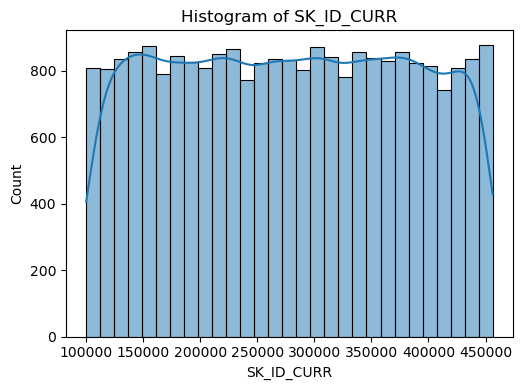

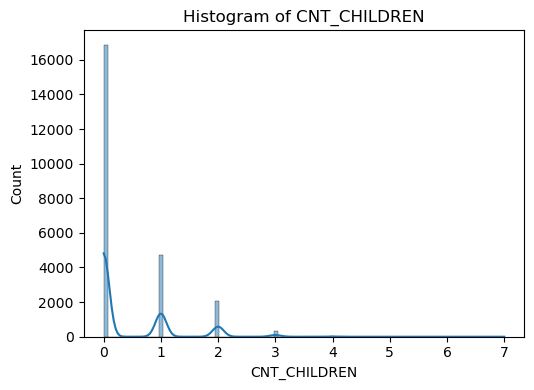

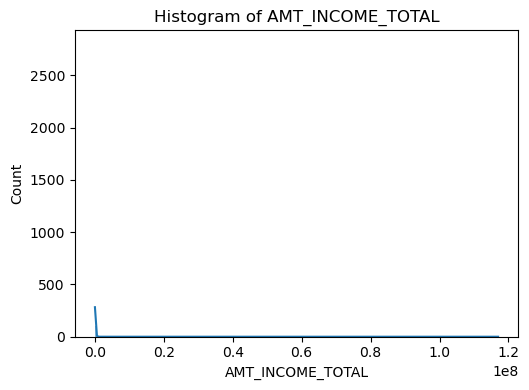

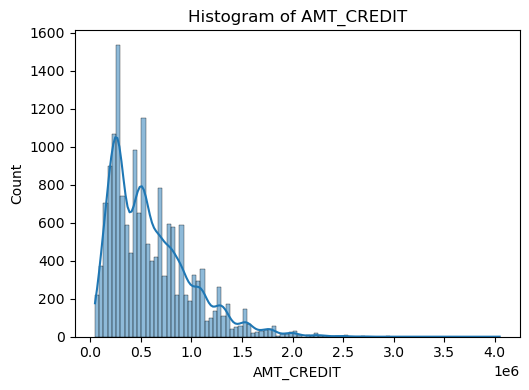

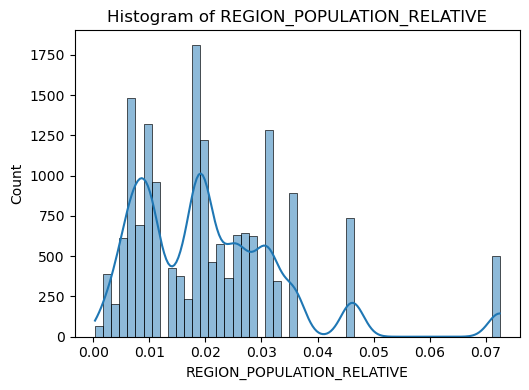

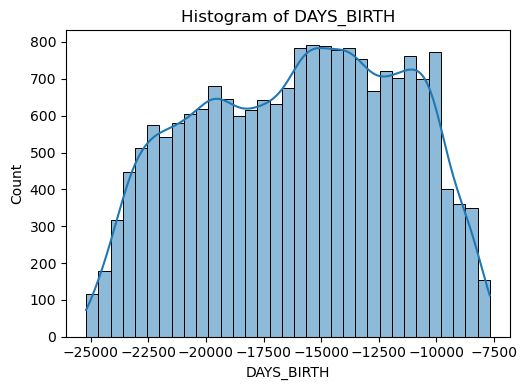

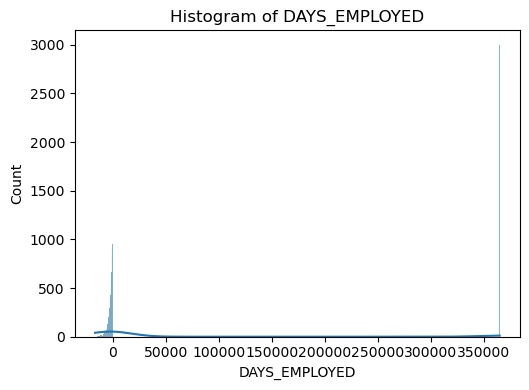

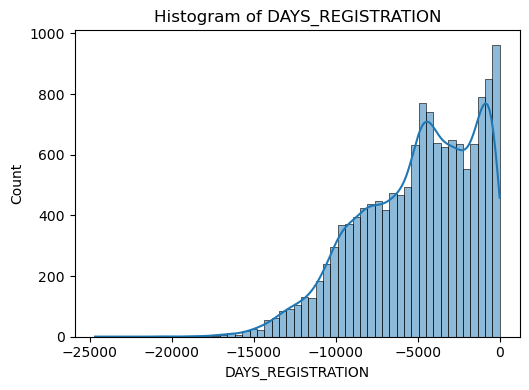

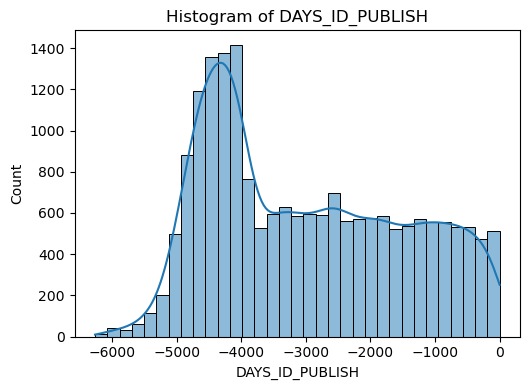

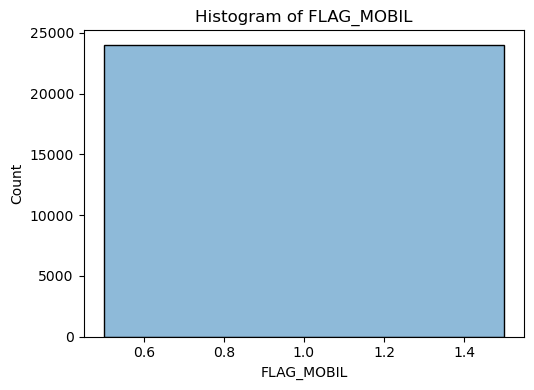

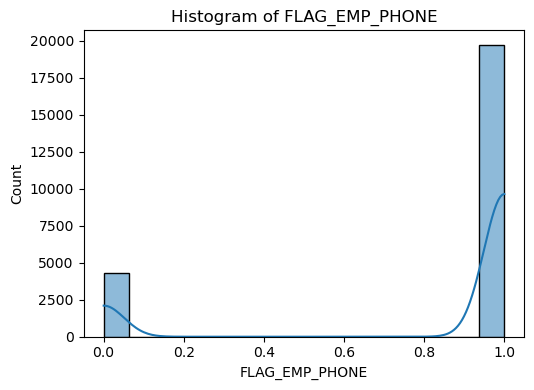

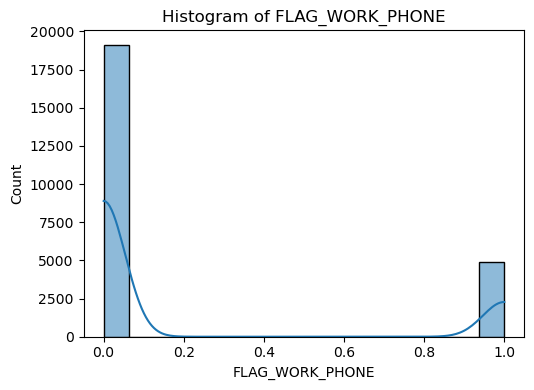

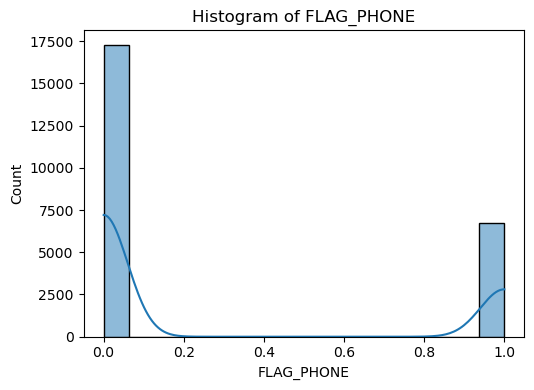

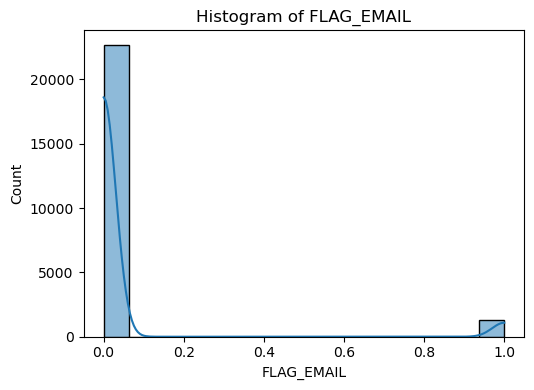

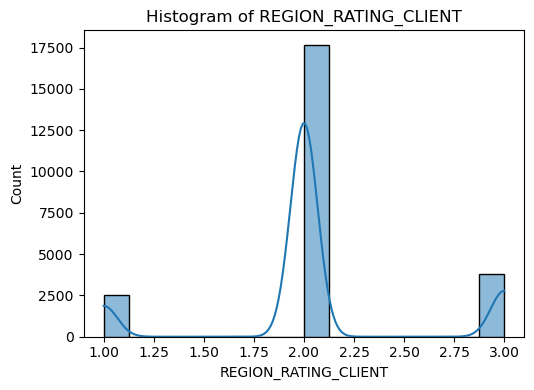

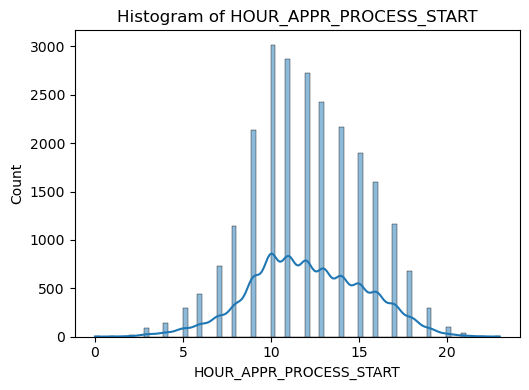

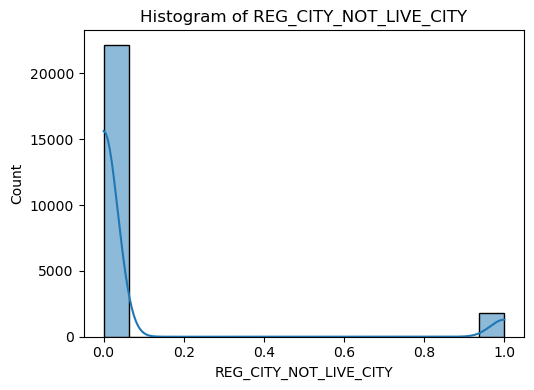

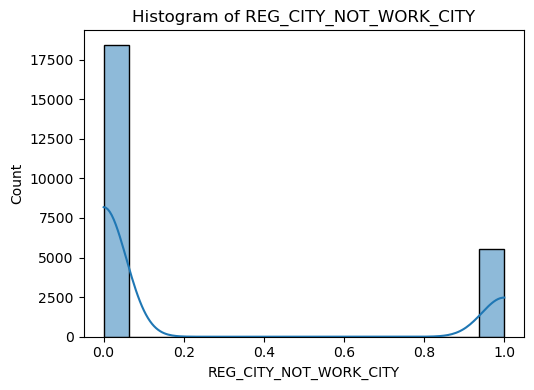

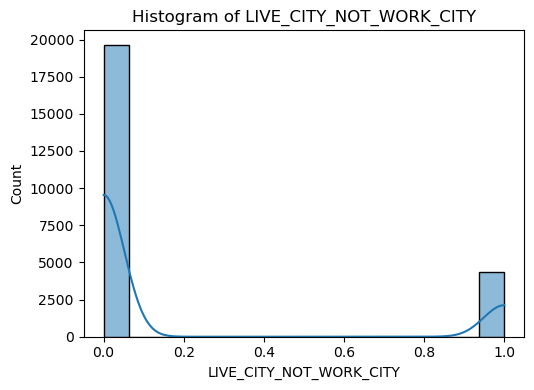

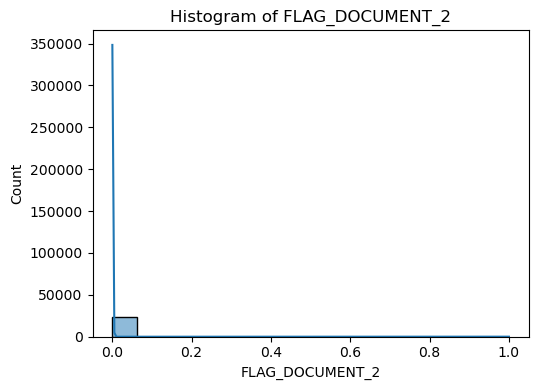

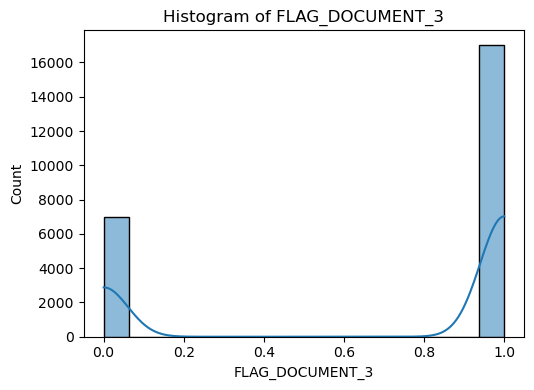

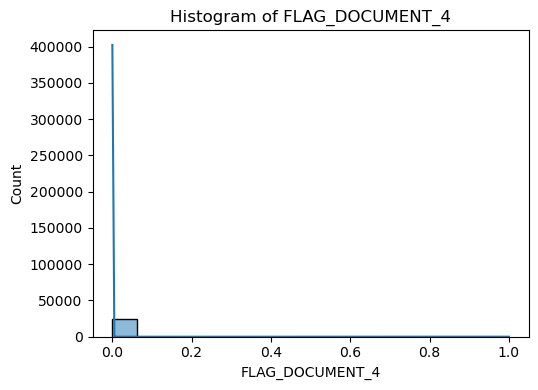

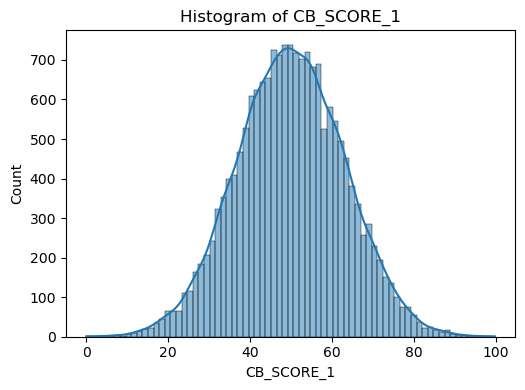

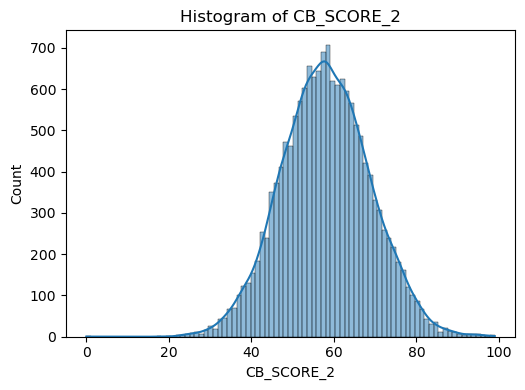

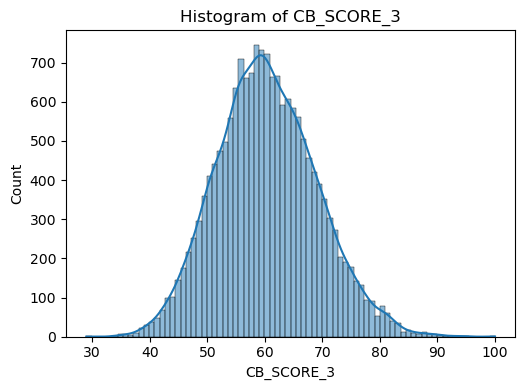

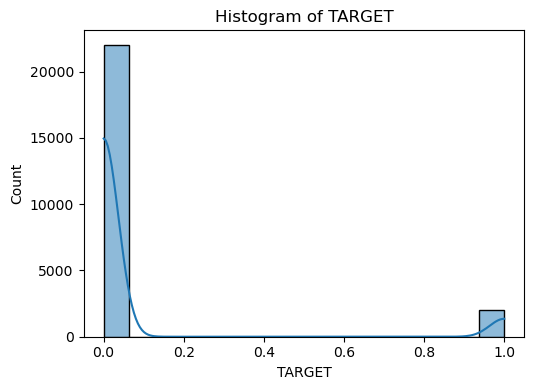

In [13]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()


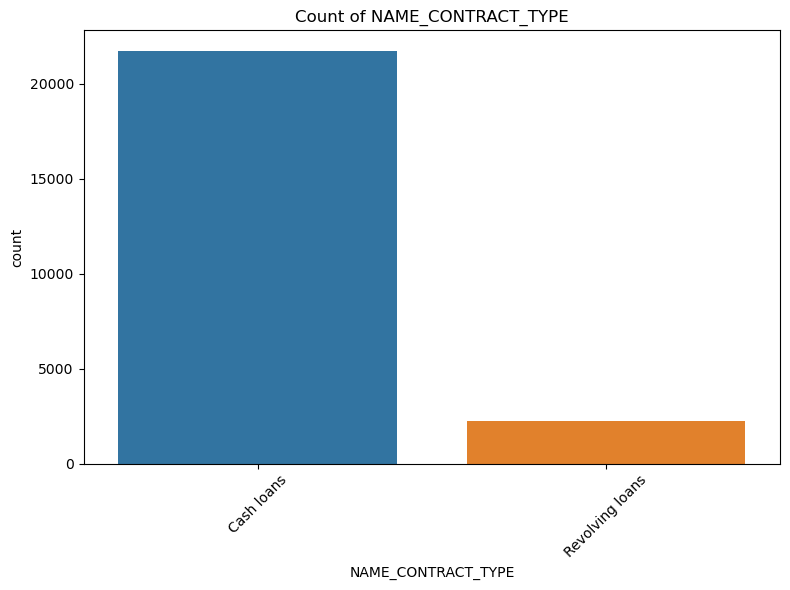

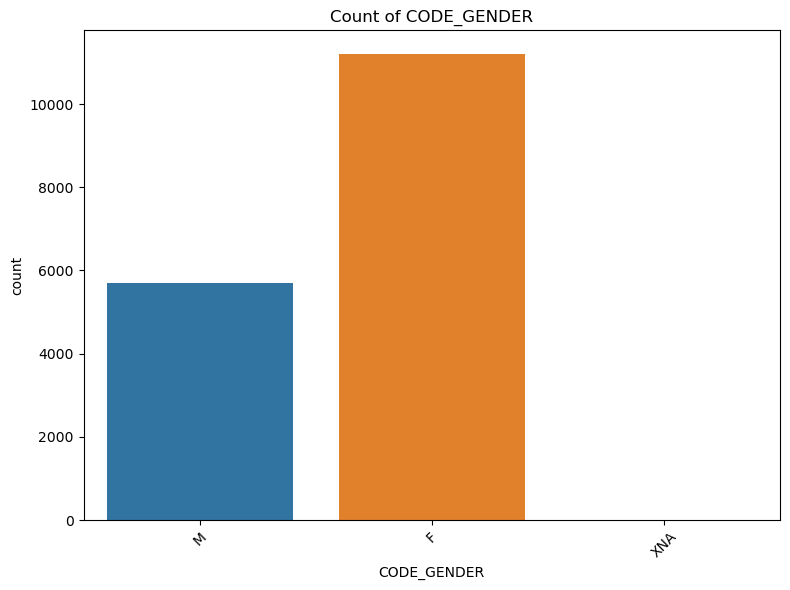

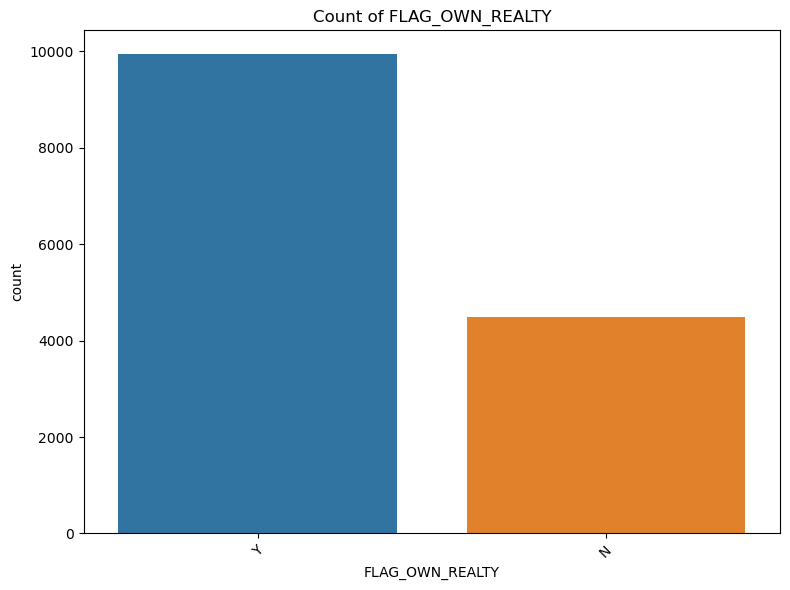

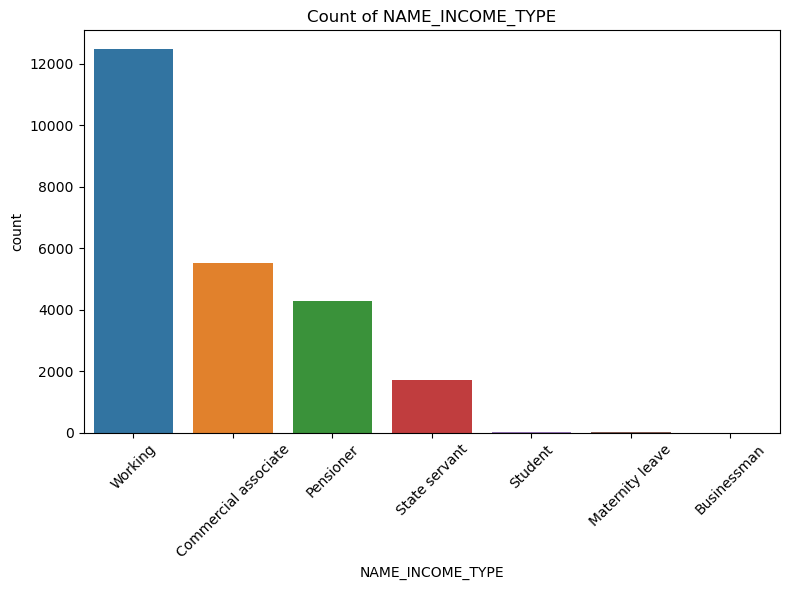

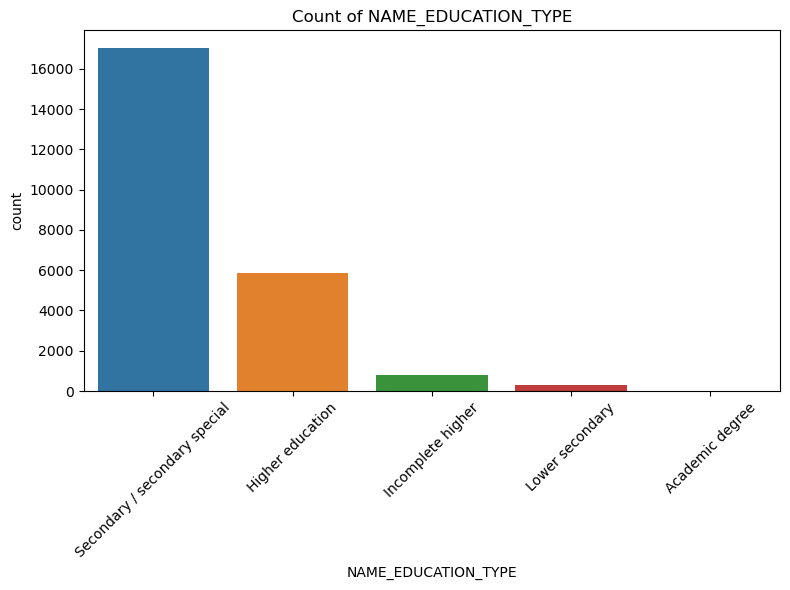

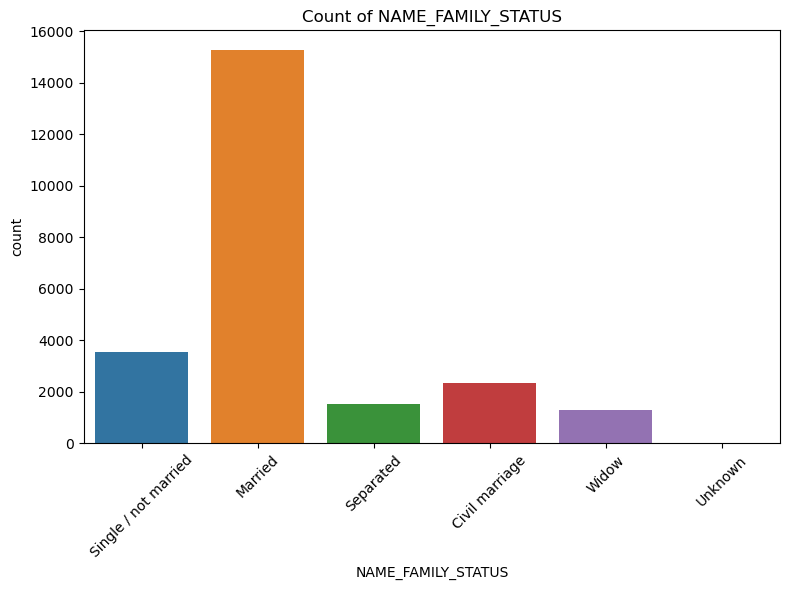

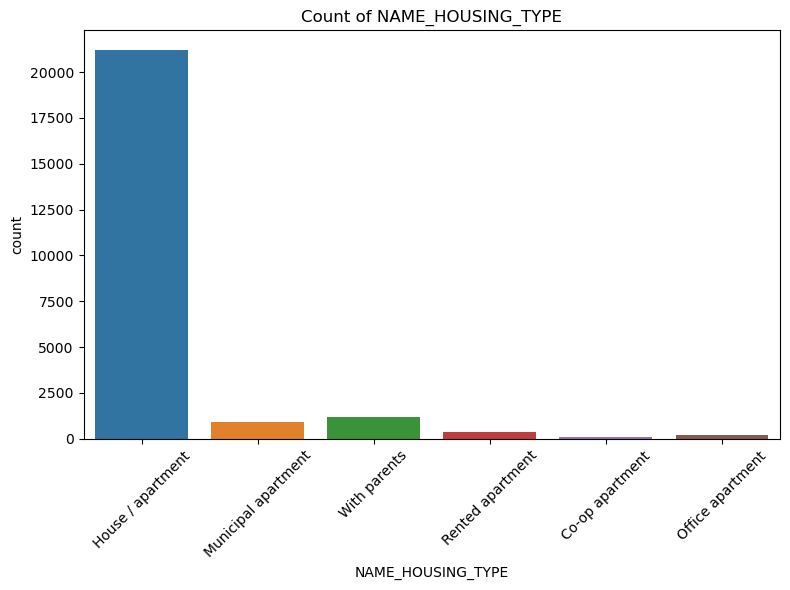

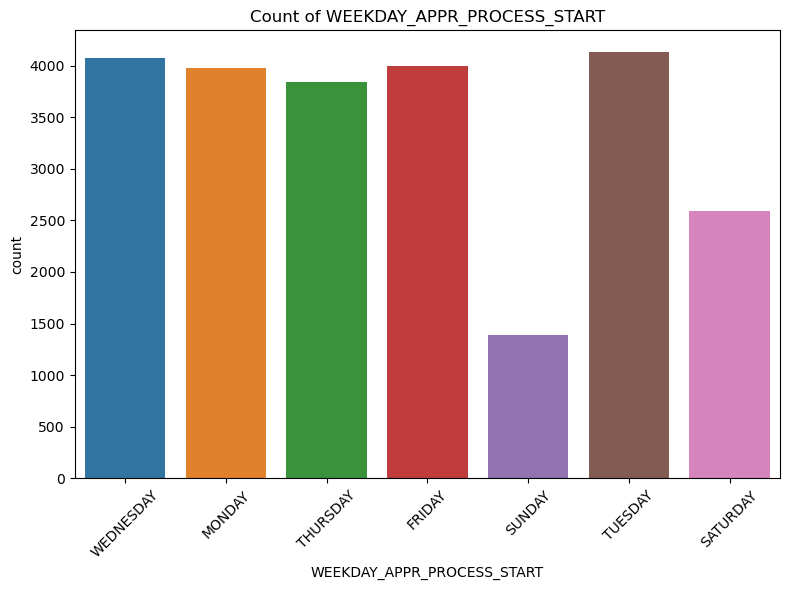

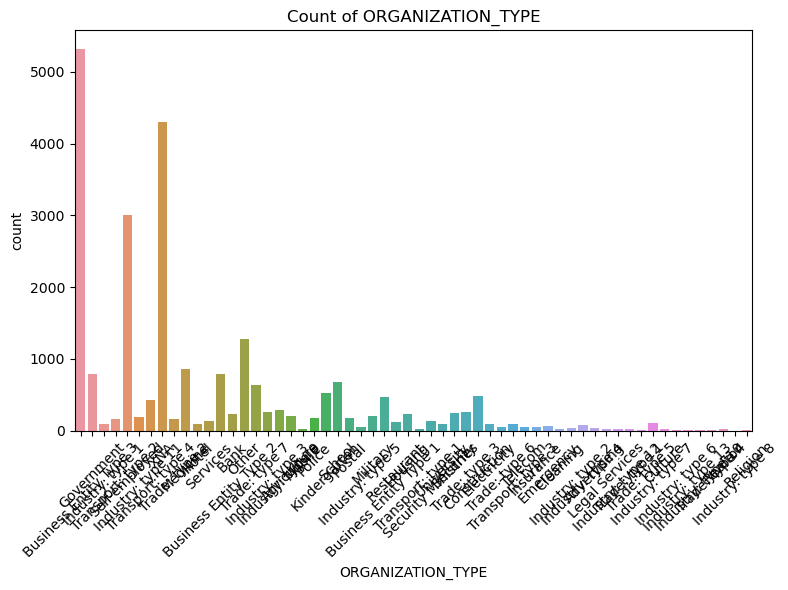

In [18]:
# 범주형 변수 시각화 (막대 그래프)
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x= data[column] ,data=data[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 다변량 분석